In [152]:
library(gprofiler2)

In [153]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_labels.csv"
df_clusters = read.csv(filename, row.names = 1)

In [154]:
# load cluster summaries
cluster_summaries = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_summaries.csv", row.names=1)
colnames(cluster_summaries) = paste0("cluster",0:(ncol(cluster_summaries)-1))
head(cluster_summaries,2)

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12
HPSI0114i-bezi_3--DA--d30--0,-0.4484601,-0.5605256,0.4431604,0.06992130,-0.2984169,-0.5641219,-0.4401368,0.4334653,-0.4650882,0.2939332,-1.243271,-0.04281979,0.7379030
HPSI0114i-bezi_3--DA--d30--1,-0.6252559,-0.6718539,0.4627875,-0.01094634,-0.4336557,-0.6369368,-0.3925566,0.2768024,-0.3851861,0.2344896,-1.315434,-0.04906741,0.8941735


In [155]:
input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/input_files/"
# Phenotype
phenotype_file = paste0(input_files_dir,"phenotype.csv")

In [156]:
df0 = read.csv(phenotype_file, row.names=1)
newcols = gsub("\\.","-",colnames(df0))
# head(newcols)
colnames(df0) = newcols
df0[1:5,1:5]

,HPSI0714i-iudw_1--DA--d30--0,HPSI0714i-iudw_1--DA--d30--1,HPSI0714i-iudw_1--DA--d30--2,HPSI0714i-iudw_1--DA--d30--3,HPSI0714i-iudw_1--DA--d30--4
MIR1302.10,0,0,0,0,0
FAM138A,0,0,0,0,0
OR4F5,0,0,0,0,0
RP11.34P13.7,0,0,0,0,0
RP11.34P13.8,0,0,0,0,0


In [157]:
df1 = df0[,rownames(cluster_summaries)]
ncol(df0)
ncol(df1)
df1[1:5,1:5]

[1] 9219

[1] 8352

,HPSI0114i-bezi_3--DA--d30--0,HPSI0114i-bezi_3--DA--d30--1,HPSI0114i-bezi_3--DA--d30--10,HPSI0114i-bezi_3--DA--d30--11,HPSI0114i-bezi_3--DA--d30--12
MIR1302.10,0,0,0,0,0
FAM138A,0,0,0,0,0
OR4F5,0,0,0,0,0
RP11.34P13.7,0,0,0,0,0
RP11.34P13.8,0,0,0,0,0


In [158]:
rowsums = rowSums(df1)

In [159]:
# remove all 0 genes
zero_genes = names(rowsums[rowsums==0])
head(zero_genes)
length(zero_genes)

[1] "FAM138A"       "OR4F5"         "RP11.34P13.14" "OR4F29"       
[5] "RP5.857K21.2"  "OR4F16"

[1] 4476

In [160]:
non0_pseudocells = rowSums(df1>0)
head(non0_pseudocells)

MIR1302.10      FAM138A        OR4F5 RP11.34P13.7 RP11.34P13.8   AL627309.1 
          56            0            0          287           15          834

In [161]:
# remove genes in less 10% of pseudocells
low_genes = names(non0_pseudocells[non0_pseudocells<0.1*ncol(df1)])
head(low_genes)
length(low_genes)

[1] "MIR1302.10"   "FAM138A"      "OR4F5"        "RP11.34P13.7" "RP11.34P13.8"
[6] "AL627309.1"

[1] 19035

In [187]:
all_genes_df = df1

In [188]:
df1_new = df1[!(rownames(df1) %in% unique(c(zero_genes, low_genes))),]
nrow(df1_new)

[1] 13703

In [189]:
df1 = df1_new

In [190]:
genes = rownames(df1)
length(genes)
head(genes)

[1] 13703

[1] "AP006222.2"    "RP11.206L10.3" "RP11.206L10.9" "LINC00115"    
[5] "FAM41C"        "RP11.54O7.1"

In [191]:
cluster = 4

In [192]:
gene_list = c()
for (gene in genes){
    gene_list = c(gene_list, cor(as.numeric(df1[gene,]), cluster_summaries[,cluster+1]))
}
names(gene_list) = genes
gene_list = gene_list[order(gene_list, decreasing=T)]

In [193]:
length(gene_list)

[1] 13703

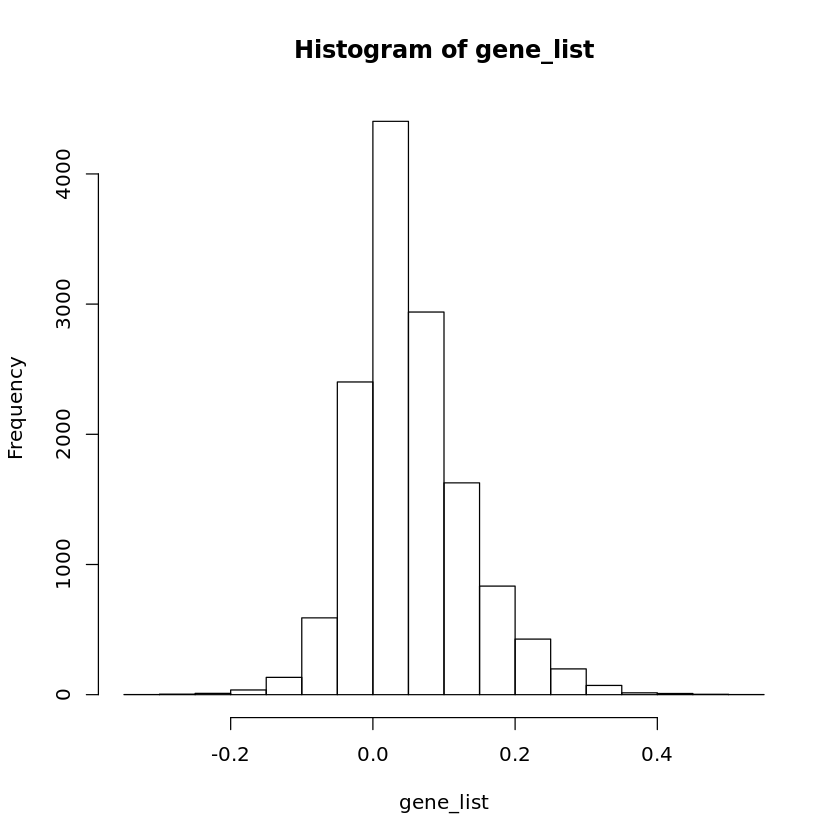

In [194]:
hist(gene_list)

In [195]:
df_corr = data.frame(gene = names(gene_list), corr_cluster4 = gene_list)
head(df_corr)

,gene,corr_cluster4
PODXL2,PODXL2,0.5031172
CALY,CALY,0.4990763
C1QTNF4,C1QTNF4,0.4727456
LRRC24,LRRC24,0.4547574
TMEM160,TMEM160,0.4494777
SCAND1,SCAND1,0.4357447


In [196]:
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster12.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster0.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster1.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster5.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster8.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster9.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster11.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster2.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster10.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster3.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster6.csv")
# write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster7.csv")
write.csv(df_corr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/July2021/corrs_cluster4.csv")

In [197]:
genes_pos = gene_list[gene_list>0.3]
# order
genes_pos = genes_pos[order(genes_pos, decreasing = T)]
# get gene names only
genes = gsub(".*_","",names(genes_pos))
# run gprofiler
gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=TRUE, user_threshold = 0.01)
df_list0 = as.data.frame(gres$result)
df_list0

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
query_1,TRUE,2.782421e-03,230,43,7,0.16279070,0.030434783,GO:0006457,GO:BP,protein folding,18123,2450,GO:0009987
query_1,TRUE,6.590745e-03,33,53,4,0.07547170,0.121212121,GO:0006007,GO:BP,glucose catabolic process,18123,2050,"GO:0006006, GO:0019320"
query_1,TRUE,7.451833e-03,2,31,2,0.06451613,1.000000000,GO:0061741,GO:BP,obsolete chaperone-mediated protein transport involved in chaperone-mediated autophagy,18123,18403,
query_1,TRUE,1.183468e-05,4651,51,31,0.60784314,0.006665233,GO:0012505,GO:CC,endomembrane system,18964,817,GO:0110165
query_1,TRUE,1.661842e-04,3644,84,36,0.42857143,0.009879254,GO:0031090,GO:CC,organelle membrane,18964,1217,"GO:0016020, GO:0043227"
query_1,TRUE,5.423646e-04,2433,55,21,0.38181818,0.008631319,GO:0031410,GO:CC,cytoplasmic vesicle,18964,1322,"GO:0005737, GO:0097708"
query_1,TRUE,5.609285e-04,2438,55,21,0.38181818,0.008613618,GO:0097708,GO:CC,intracellular vesicle,18964,3497,"GO:0031982, GO:0043231"
query_1,TRUE,6.611759e-04,1027,51,13,0.25490196,0.012658228,GO:0099503,GO:CC,secretory vesicle,18964,3780,GO:0031410
query_1,TRUE,1.003937e-03,9829,70,55,0.78571429,0.005595686,GO:0016020,GO:CC,membrane,18964,850,GO:0110165
query_1,TRUE,1.966383e-03,1132,83,17,0.20481928,0.015017668,GO:0005789,GO:CC,endoplasmic reticulum membrane,18964,433,"GO:0031090, GO:0042175, GO:0098827"


In [198]:
genes_neg = gene_list[gene_list<(-0.2)]
# order
genes_neg = genes_neg[order(genes_neg)]
# get gene names only
genes = gsub(".*_","",names(genes_neg))
# run gprofiler
gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=TRUE, user_threshold = 0.01)
df_list1 = as.data.frame(gres$result)
df_list1

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
query_1,TRUE,0.001807228,4,12,2,0.1666667,0.50,CORUM:6984,CORUM,ProTalpha C2 complex,3627,2499,CORUM:0000000
query_1,TRUE,0.003248774,50,10,3,0.3000000,0.06,GO:0060425,GO:BP,lung morphogenesis,18123,17242,"GO:0009887, GO:0030324"


In [199]:
genes_pos = gene_list[gene_list>0.4]
# AND negatively correlated genes
genes_neg = gene_list[gene_list<(-0.1)]
genes_corr = c(genes_pos, genes_neg)
genes_corr = abs(genes_corr)
# order
genes_corr = genes_corr[order(genes_corr,decreasing=TRUE)]
# get gene names only
genes = gsub(".*_","",names(genes_corr))
# run gprofiler
gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=TRUE, user_threshold = 0.01)
df_list2 = as.data.frame(gres$result)
df_list2

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
query_1,TRUE,1.789611e-03,1499,161,33,0.20496894,0.02201468,GO:0010648,GO:BP,negative regulation of cell communication,18123,4806,"GO:0007154, GO:0010646, GO:0048523"
query_1,TRUE,1.871174e-03,1502,161,33,0.20496894,0.02197071,GO:0023057,GO:BP,negative regulation of signaling,18123,7676,"GO:0023051, GO:0023052, GO:0048519"
query_1,TRUE,2.095566e-03,56,109,6,0.05504587,0.10714286,GO:0021879,GO:BP,forebrain neuron differentiation,18123,7438,"GO:0021872, GO:0021953"
query_1,TRUE,3.155392e-03,72,143,7,0.04895105,0.09722222,GO:0003281,GO:BP,ventricular septum development,18123,1860,"GO:0003231, GO:0003279"
query_1,TRUE,3.323265e-03,1394,161,31,0.19254658,0.02223816,GO:0009968,GO:BP,negative regulation of signal transduction,18123,4281,"GO:0007165, GO:0009966, GO:0010648, GO:0023057, GO:0048585"
query_1,TRUE,3.522716e-03,83,80,6,0.07500000,0.07228916,GO:0002088,GO:BP,lens development in camera-type eye,18123,801,"GO:0043010, GO:0048856"
query_1,TRUE,4.822117e-03,1052,143,24,0.16783217,0.02281369,GO:0007417,GO:BP,central nervous system development,18123,3304,"GO:0007399, GO:0048731"
query_1,TRUE,5.102454e-03,65,109,6,0.05504587,0.09230769,GO:0021872,GO:BP,forebrain generation of neurons,18123,7431,"GO:0030900, GO:0048699"
query_1,TRUE,5.748299e-03,259,131,11,0.08396947,0.04247104,GO:0021537,GO:BP,telencephalon development,18123,7101,"GO:0030900, GO:0048856"
query_1,TRUE,6.097693e-03,333,146,13,0.08904110,0.03903904,GO:0090287,GO:BP,regulation of cellular response to growth factor stimulus,18123,21357,"GO:0048583, GO:0050794, GO:0071363"
